In [3]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
from IPython.display import clear_output

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output


import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc
import h5py

import sympy as sym

    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font)

<h1>Introduction to Statistics in Turbulence</h1>
<h2>Jet flow data</h2>
The directory 'Data-Jet' contains velocity signals taken in a turbulent jet using Laser Doppler Velocimetry. Details can be found here:
http://ldvproc.nambis.de/data/ektdata.html

The objectives of this project are:
<ol>
<li> Extract the mean velocity and velocity fluctuations</li>
<li> Compute statistical moments</li>
<li> Plot probability density functions and understand the meaning of skewness and flatness</li>
<li> Study the convergence of statistics</li>
<li> Compute the power density spectrum of this signal</li>
</ol>

Number of samples: 103081


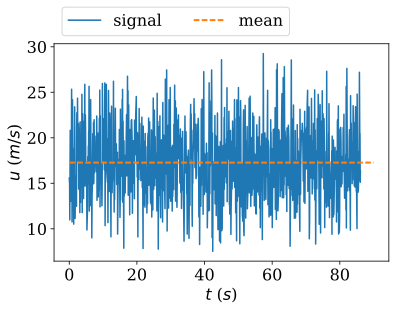

In [4]:
t, u, tmp = np.genfromtxt('Data/p20_20.ts', delimiter='', unpack=True, dtype=float)
N = t.shape[0]
print('Number of samples: %6i'%N)
plt.plot(t[0:N+1:100],u[0:N+1:100],label = r"signal")
um_plot = np.mean(u)*np.ones(2)
t_line_plot = np.array([0, 90.])
plt.plot(t_line_plot,um_plot,'--',lw=2, label = r"mean")
plt.legend(loc=3, bbox_to_anchor=[0, 1],
          ncol=3, shadow=False, fancybox=True)
plt.xlabel('$t$ ($s$)', fontdict = fontlabel)
plt.ylabel('$u$ ($m/s$)', fontdict = fontlabel)
plt.show()

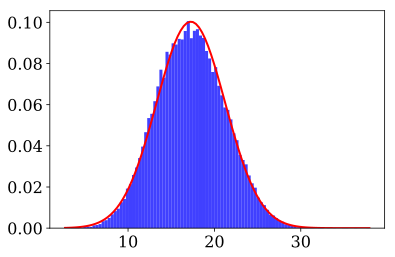

In [5]:
import matplotlib.mlab as mlab
n, bins, patches = plt.hist(u, 100, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, np.mean(u), np.std(u))
plt.plot(bins, y, 'r-', linewidth=2)

In [8]:
np.min(t[1:]-t[0:-1])
np.max(t[1:]-t[0:-1])
# plt.xlim(0,20)
# plt.ylim(1e-6,1e-5)
    

0.101687

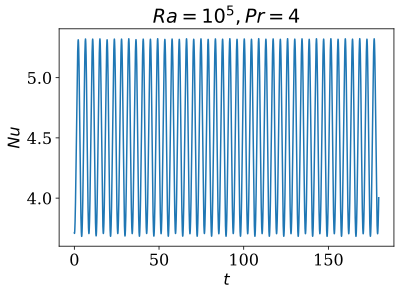

4.48127206659


In [10]:
data = np.genfromtxt("Data/Nu.01.001.dat")
plt.plot(data[:,0],data[:,1])
plt.xlabel(r"$t$", fontdict=fontlabel)
plt.ylabel(r"$Nu$", fontdict=fontlabel)
plt.title(r"$Ra=10^5,Pr=4$")
plt.savefig("Nu_signal_2per.png", bbox_inches='tight')
plt.show()
print(np.mean(data[:,1]))

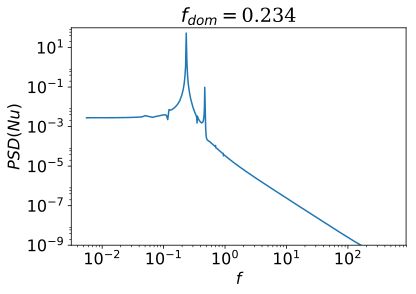

In [11]:
dt = 1e-3
fs = 1/dt
import scipy.signal as sig
Nu = np.copy(data[:,1])
f, p = sig.periodogram(Nu,fs)

plt.loglog(f,p)
plt.ylim(1e-9,1e2)
plt.xlabel(r"$f$", fontdict=fontlabel)
plt.ylabel(r"$PSD(Nu)$", fontdict=fontlabel)
titlestr = "$f_{dom}=$"
titlestr += "{0:.3f}".format(f[np.argmax(p)])
plt.title(titlestr)
plt.savefig("Nu_PSD.png", bbox_inches='tight')
plt.show()

<h1>Channel Flow Reynolds Average Navier Stokes Equations</h1>

For a fully developed channel flow of spanwise direction must greated to the height $H=2h$ between the walls, the flow statistics are independent of $x_1=x$ and $x_3=z$. Under steady state conditions, the RANS equations:
$$
\frac{\partial\overline{u}_i}{\partial x_i} = 0
$$
and
$$
\frac{\partial \overline{u}_i}{\partial t}+\frac{\partial \overline{u}_i\overline{u}_j}{\partial x_j}=-\frac{1}{\rho}\frac{\partial \overline{p}}{\partial x_i}+\frac{\partial}{\partial x_j}\left[\nu\left(\frac{\partial \overline{u}_i}{\partial x_j}+\frac{\partial \overline{u}_j}{\partial x_i}\right)-\overline{u'_iu'_j}\right]
$$
reduce to
$$
0=-\frac{1}{\rho}\frac{d\overline{p}}{dx_1}+\frac{d}{dx_2}\left(\nu\frac{d\overline{u}_1}{dx_2}-\overline{u'_1u'_2}\right)\text{ and }\overline{u}_2=\overline{u}_3=0,
$$
or
$$
0=-\frac{1}{\rho}\frac{d\overline{p}}{dx}+\frac{d}{dy}\left[\nu\frac{d\overline{u}}{dy}-\overline{u'v'}\right]\text{ and }\overline{v}=\overline{w}=0.
$$

The last term $-\overline{u'v'}$ on the RHS is called the Reynolds shear stress. It represents the energy dissipative stress added by turbulence to help the viscous stress (second to last term), here the shear stress. 

<h1> Asymptotic behavior</h1>

In any field of physics, the behavior of governing variables often informs on the physics itself and can also help with modeling. Consider a variable $\phi$ in a 1D problem, function of a distance $y$. The asymptotic development of $\phi$ at a given boundary, say $y=0$, is simply:
$$
\phi= a_0+a_1y+a_2y^2+a_3y^3+...
$$
Such expansion helps identify the rate of decay of a quantity close to the wall, which would be the leading order term of $\phi-a_0$, the first term $a_ny^n$ with $a_n\neq0$.

<h1>Closure model for the Reynolds shear stress</h1>

The most common closure model (we will explain why closure later) is the Boussinesq model or gradient diffusion model. Since turbulence is a dissipative process, it is assumed to behave like a viscous stress. In the case of the channel flow, it takes the form:
$$
-\overline{u'v'} = \nu_T \frac{d\overline{u}}{dy}
$$
where $\nu_T$ is the turbulent eddy viscosity, which is a local quantity.
The RANS equation with this closure model becomes:
$$
0=-\frac{1}{\rho}\frac{d\overline{p}}{dx}+\frac{d}{dy}\left[(\nu+\nu_T)\frac{d\overline{u}}{dy}\right]
$$
If $\nu_T$ is known, the above equation can be solved.
When normalized by viscous scales,
$$
u^+=u/u_\tau,\; y^+=yu_\tau/\nu,\; t^+=tu_\tau^2/\nu\text{, with }\rho u_\tau^2=\mu(d\overline{u}/dy)_\text{wall}=\tau_\text{w}
$$ 
this equation writes:
$$
0=\frac{1}{h^+}+\frac{d}{dy^+}\left[(1+\nu_T^+)\frac{d\overline{u}^+}{dy^+}\right]
$$
which can be discretized on a uniform grid by central difference scheme:
$$
0=\frac{1}{h^+}+\frac{1}{\Delta y^+}\left[(1+{\nu_T^+}_{j+1/2})\frac{\overline{u}_{j+1}^+-\overline{u}_{j}^+}{\Delta y^+}-(1+{\nu_T^+}_{j-1/2})\frac{\overline{u}_{j}^+-\overline{u}_{j-1}^+}{\Delta y^+}\right]\,.
$$
This equation can be rearrange as:
$$
\frac{{\nu^+_T}_{j-1}+{\nu^+_T}_{j}}{2}\frac{\overline{u}_{j}^+-\overline{u}_{j-1}^+}{(\Delta y^+)^2}-\frac{{\nu^+_T}_{j}+{\nu^+_T}_{j+1}}{2}\frac{\overline{u}_{j+1}^+-\overline{u}_{j}^+}{(\Delta y^+)^2}= \frac{1}{h^+} + \frac{\overline{u}_{j-1}^+-2\overline{u}_{j}^++\overline{u}_{j+1}^+}{(\Delta y^+)^2}\,,
$$
or
$$
\frac{\overline{u}_{j}^+-\overline{u}_{j-1}^+}{2(\Delta y^+)^2}{\nu^+_T}_{j-1}-
\frac{\overline{u}_{j-1}^+-2\overline{u}_{j}^++\overline{u}_{j+1}^+}{2(\Delta y^+)^2}{\nu^+_T}_{j}-
\frac{\overline{u}_{j+1}^+-\overline{u}_{j}^+}{(2\Delta y^+)^2}{\nu^+_T}_{j+1}= \frac{1}{h^+} + \frac{\overline{u}_{j-1}^+-2\overline{u}_{j}^++\overline{u}_{j+1}^+}{(\Delta y^+)^2}\,,
$$
which is readily in a tridiagonal matrix form:
$$
A_{i\,j}n_{j}=b_i
$$
with
\begin{eqnarray}
&A_{i\,j-1}&= \frac{\overline{u}_{j}^+-\overline{u}_{j-1}^+}{2(\Delta y^+)^2}\,,\\
&A_{i\,j}&= -\frac{\overline{u}_{j-1}^+-2\overline{u}_{j}^++\overline{u}_{j+1}^+}{2(\Delta y^+)^2}\,,\\
&A_{i\,j+1}&= -\frac{\overline{u}_{j+1}^+-\overline{u}_{j}^+}{(2\Delta y^+)^2}\,,\\
&b_i&= \frac{1}{h^+} + \frac{\overline{u}_{j-1}^+-2\overline{u}_{j}^++\overline{u}_{j+1}^+}{(\Delta y^+)^2}\,.
\end{eqnarray}
The vector $n_i$ contains the unknown $n_i={\nu^+_T}_i$, where $n_0$ is the first node off the wall and $n_{N-1}$ is the last point off the centerline. The boundary conditions are
$$
n_{-1} = 0\text{ and } n_N=n_{N-1}\text{ (symmetry)}\,.
$$
This approach is preferrable to
$$
\nu_T^+=\cfrac{-\overline{u'v'}}{\cfrac{d\overline{u}}{dy}}
$$
in non-canonical cases, such as Stokes layer, flow separation, where the mean shear may be zero in some regions of the flow. Although the code is given below, for the steady state channel flow, we can used the relation above to determine $\nu_T^+$.


<h1>Channel Flow Data</h1>

The directory 'Channel-data' contains velocity statistics in turbulent channel flow obtained from numerical simulation.

The objectives of this project are:
<ol>
<li> Plot mean velocity profiles at all Reynolds numbers. Use existing plots or make new plots to discuss the following assertions:
<ul>
<li>The mean velocity profile can be described as a log-law for $y^+\gtrsim 50$, of the form:
$$
\overline{u}^+=\frac{1}{\kappa}\ln(y^+)+B\text{ with }\kappa=0.41\text{ and } B=5.2
$$
To strengthen your discussion, use the indicator function 
$$
\zeta = y^+\frac{d\overline{u}^+}{dy^+}\,.
$$

These two papers (Fig. 3, http://dx.doi.org/10.1063/1.3681862) and (Fig. 6, http://dx.doi.org/10.1063/1.4817073) show much better agreement for the cases without polymer additives. The second is an experiment. Should you trust the simulation data at high Reynolds numbers?
</li>
<li>Very close to the wall, $\overline{u}^+=y^+$.</li>
</ul></li>
<li> Plot the non-zero components of the Reynolds tensor at all Reynolds numbers. Using your own plots, discuss the following assertions (Warning, these statistics are not as well converged as I had hoped, the plots will show an approximate trend but not provide a strong support for the assertions. Better converged data would verify the assertions):
<ul>
<li>$u_{rms}^+=\sqrt{\overline{u_1'^2}}^+\propto y^+$ close to the wall</li>
<li>$v_{rms}^+\propto (y^+)^2$ close to the wall</li>
<li>$w_{rms}^+\propto y^+$ close to the wall</li>
<li>Based on the previous assertions, what asymptotic behavior can you predict for $\overline{u_1'u_2'}^+$? In other words what should $n$ be in $\overline{u_1'u_2'}^+\propto (y^+)^n$ close to the wall. Use a plot to support your assertion</li>
</ul></li>
<li> Using the continuity equation, show that the wall-normal velocity fluctuation should decay as $(y^+)^2$ at the wall. </li>
<li> Discuss the universality of the statistics ploted so far</li>
<li> Derive the eddy viscosity for all Reynolds numbers. First plot $\nu_T^+=f(y^+)$ then plot
$$
\frac{\nu_T^+}{h^+}=f\left(\frac{y}{h}\right)\,.
$$
What do you observe?</li>
</ol>